In [4]:
from PIL import Image as img
import numpy as np
import cv2
import matplotlib.pyplot as plt
lena=img.open('lena.bmp')
lena_arr = np.asarray(lena)

In [5]:
def expan(arr):
    m=len(arr)
    n=len(arr[0])
    res=res=[[0]*(n+2) for i in range(m+2)]
    for i in range(1,m+1):
        res[i][0]=arr[i-1][0]
        res[i][n+1]=arr[i-1][n-1]
    for j in range(1,n+1):
        res[0][j]=arr[0][j-1]
        res[m+1][j]=arr[m-1][j-1]
    res[0][0]=arr[0][0]
    res[0][n+1]=arr[0][n-1]
    res[m+1][0]=arr[m-1][0]
    res[m+1][n+1]=arr[m-1][n-1]
    for i in range(1,m+1):
        for j in range(1,n+1):
            res[i][j]=arr[i-1][j-1]
    return res
    

In [49]:
def robert(lena,theshold):
    res=[[0]*len(lena[0]) for i in range(len(lena))]
    for i in range(len(lena)):
        for j in range(len(lena[0])):
            if i==len(lena)-1 and j==len(lena[0])-1:
                grad=lena[i][j]
            elif i==len(lena)-1:
                grad=(lena[i][j]**2+lena[i][j+1]**2)**0.5
            elif j==len(lena[0])-1:
                grad=(lena[i][j]**2+lena[i+1][j]**2)**0.5
            else:
                grad=((lena[i][j]-lena[i+1][j+1])**2+(lena[i+1][j]-lena[i][j+1])**2)**0.5
            if grad<theshold:
                res[i][j]=255
    return res
                

In [10]:
def robert(lena,theshold):
    res=[[255]*len(lena[0]) for i in range(len(lena))]
    lena=expan(lena)
    for i in range(len(lena)-2):
        for j in range(len(lena[0])-2):
            grad=((lena[i+1][j+1]-lena[i+2][j+2])**2+(lena[i+2][j+1]-lena[i+1][j+2])**2)**0.5
            if grad>=theshold:
                res[i][j]=0
    return res

In [11]:
a=robert(np.array(lena_arr,dtype='int'),12)

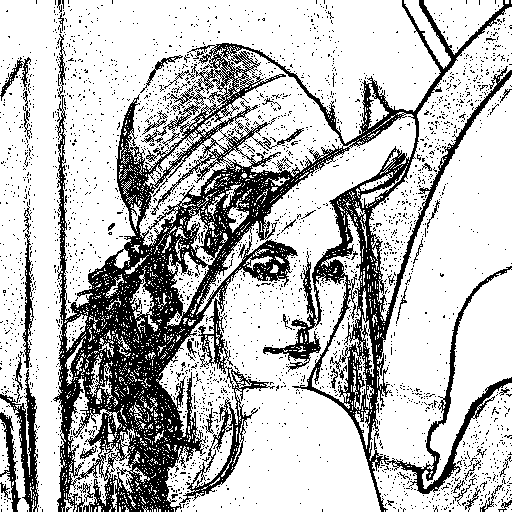

In [12]:
img.fromarray(np.array(a,dtype='uint8'))

In [88]:
def prewitt(lena,theshold):
    m=len(lena)
    n=len(lena[0])
    lena=expan(lena)
    res=[[0]*(n) for i in range(m)]
    for i in range(m):
        for j in range(n):
            p1=lena[i+2][j]+lena[i+2][j+1]+lena[i+2][j+2]-lena[i][j]-lena[i][j+1]-lena[i][j+2]
            p2=lena[i][j+2]+lena[i+1][j+2]+lena[i+2][j+2]-lena[i][j]-lena[i+1][j]-lena[i+2][j]
            grad=(p1**2+p2**2)**0.5
            if grad<theshold:
                res[i][j]=255
    return res

In [89]:
b=prewitt(np.array(lena_arr,dtype='int'),24)

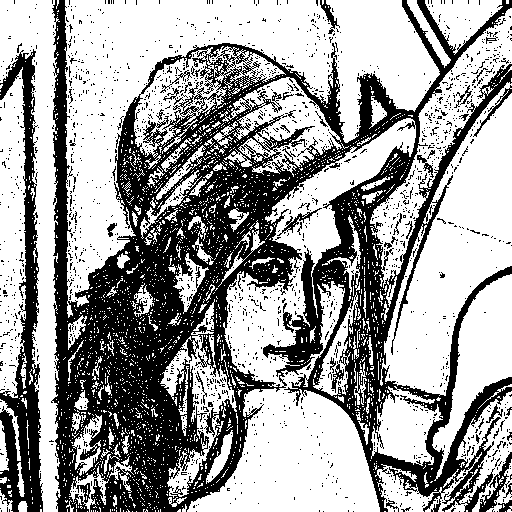

In [90]:
img.fromarray(np.array(b,dtype='uint8'))

In [92]:
def sobel(lena,theshold):
    m=len(lena)
    n=len(lena[0])
    lena=expan(lena)
    res=[[0]*(n) for i in range(m)]
    for i in range(m):
        for j in range(n):
            p1=lena[i+2][j]+2*lena[i+2][j+1]+lena[i+2][j+2]-lena[i][j]-2*lena[i][j+1]-lena[i][j+2]
            p2=lena[i][j+2]+2*lena[i+1][j+2]+lena[i+2][j+2]-lena[i][j]-2*lena[i+1][j]-lena[i+2][j]
            grad=(p1**2+p2**2)**0.5
            if grad<theshold:
                res[i][j]=255
    return res

In [95]:
c=sobel(np.array(lena_arr,dtype='int'),38)

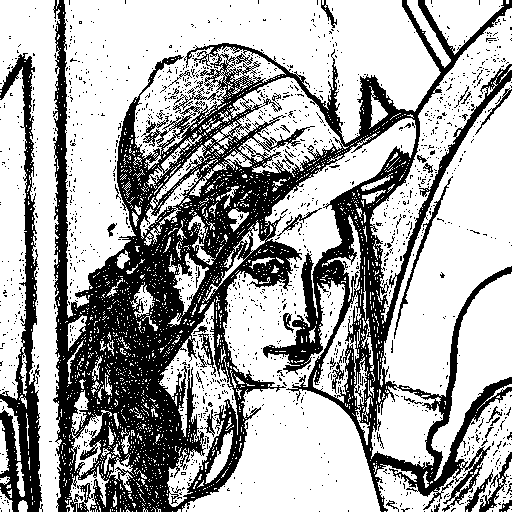

In [96]:
img.fromarray(np.array(c,dtype='uint8'))

In [102]:
def frei(lena,theshold):
    m=len(lena)
    n=len(lena[0])
    lena=expan(lena)
    res=[[0]*(n) for i in range(m)]
    for i in range(m):
        for j in range(n):
            p1=lena[i+2][j]+(2**0.5)*lena[i+2][j+1]+lena[i+2][j+2]-lena[i][j]-(2**0.5)*lena[i][j+1]-lena[i][j+2]
            p2=lena[i][j+2]+(2**0.5)*lena[i+1][j+2]+lena[i+2][j+2]-lena[i][j]-(2**0.5)*lena[i+1][j]-lena[i+2][j]
            grad=(p1**2+p2**2)**0.5
            if grad<theshold:
                res[i][j]=255
    return res

In [103]:
d=frei(np.array(lena_arr,dtype='int'),30)

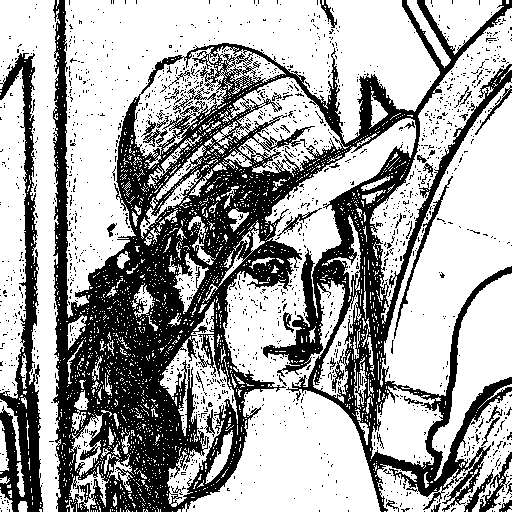

In [104]:
img.fromarray(np.array(d,dtype='uint8'))

In [120]:
def kirsch(lena,theshold):
    m=len(lena)
    n=len(lena[0])
    lena=expan(lena)
    res=[[0]*(n) for i in range(m)]
    for i in range(m):
        for j in range(n):
            p1=5*(lena[i][j+2]+lena[i+1][j+2]+lena[i+2][j+2])
            p1+=3*(-lena[i][j]-lena[i][j+1]-lena[i+1][j]-lena[i+2][j]-lena[i+2][j+1])
            
            p2=5*(lena[i][j]+lena[i+1][j]+lena[i+2][j])
            p2+=3*(-lena[i][j+2]-lena[i][j+1]-lena[i+1][j+2]-lena[i+2][j+2]-lena[i+2][j+1])
            
            p3=5*(lena[i][j]+lena[i][j+1]+lena[i][j+2])
            p3+=3*(-lena[i+1][j]-lena[i+2][j]-lena[i+1][j+2]-lena[i+2][j+2]-lena[i+2][j+1])
            
            p4=5*(lena[i+2][j]+lena[i+2][j+1]+lena[i+2][j+2])
            p4+=3*(-lena[i][j]-lena[i+1][j]-lena[i][j+2]-lena[i+1][j+2]-lena[i][j+1])
            
            p5=5*(lena[i][j]+lena[i+1][j]+lena[i][j+1])
            p5+=3*(-lena[i][j+2]-lena[i+1][j+2]-lena[i+2][j+2]-lena[i+2][j+1]-lena[i+2][j])
            
            p6=5*(lena[i][j+2]+lena[i+1][j+2]+lena[i][j+1])
            p6+=3*(-lena[i][j]-lena[i+1][j]-lena[i+2][j]-lena[i+2][j+1]-lena[i+2][j+2])
            
            p7=5*(lena[i+2][j+2]+lena[i+1][j+2]+lena[i+2][j+1])
            p7+=3*(-lena[i][j]-lena[i][j+1]-lena[i+1][j]-lena[i+2][j]-lena[i][j+2])
            
            p8=5*(lena[i+2][j]+lena[i+1][j]+lena[i+2][j+1])
            p8+=3*(-lena[i][j]-lena[i][j+1]-lena[i][j+2]-lena[i+1][j+2]-lena[i+2][j+2])
            
            
            
            grad=max(p1,p2,p3,p4,p5,p6,p7,p8)
            if grad<theshold:
                res[i][j]=255
    return res

In [123]:
e=kirsch(np.array(lena_arr,dtype='int'),135)

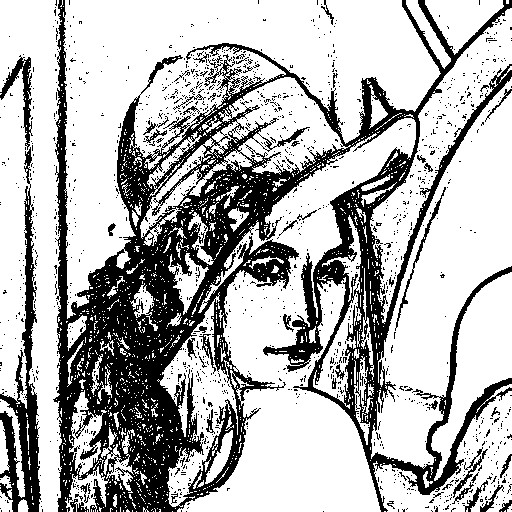

In [124]:
img.fromarray(np.array(e,dtype='uint8'))

In [128]:
def robinson(lena,theshold):
    m=len(lena)
    n=len(lena[0])
    lena=expan(lena)
    res=[[0]*(n) for i in range(m)]
    for i in range(m):
        for j in range(n):
            p1=(lena[i][j+2]+2*lena[i+1][j+2]+lena[i+2][j+2])
            p1+=(-lena[i][j]-2*lena[i+1][j]-lena[i+2][j])
            p1=abs(p1)
            
            p3=(lena[i][j]+2*lena[i][j+1]+lena[i][j+2])
            p3+=(-lena[i+2][j]-lena[i+2][j+2]-2*lena[i+2][j+1])
            p3=abs(p3)
            
            p5=2*lena[i][j]+lena[i+1][j]+lena[i][j+1]
            p5+=(-lena[i+1][j+2]-2*lena[i+2][j+2]-lena[i+2][j+1])
            p5=abs(p5)
            
            p6=2*lena[i][j+2]+lena[i+1][j+2]+lena[i][j+1]
            p6+=(-lena[i+1][j]-2*lena[i+2][j]-lena[i+2][j+1])
            p6=abs(p6)
            
            
            
            grad=max(p1,p3,p5,p6)
            if grad<theshold:
                res[i][j]=255
    return res

In [129]:
f=robinson(np.array(lena_arr,dtype='int'),43)

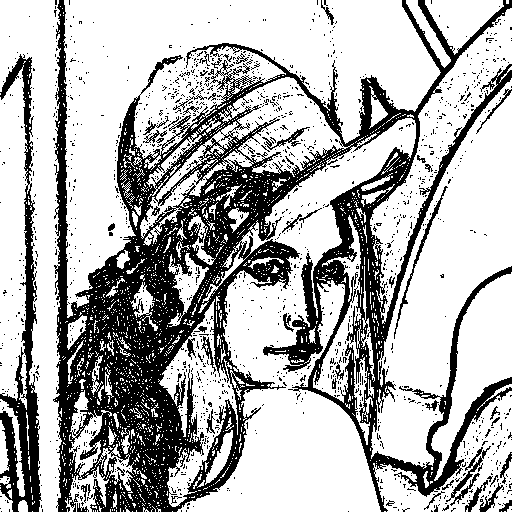

In [130]:
img.fromarray(np.array(f,dtype='uint8'))

In [132]:
def badu(lena,theshold):
    m=len(lena)
    n=len(lena[0])
    lena=expan(lena)
    lena=expan(lena)
    res=[[0]*(n) for i in range(m)]
    for i in range(m):
        for j in range(n):
            p1=100*(lena[i][j]+lena[i][j+1]+lena[i][j+2]+lena[i][j+3]+lena[i][j+4])
            p1+=100*(lena[i+1][j]+lena[i+1][j+1]+lena[i+1][j+2]+lena[i+1][j+3]+lena[i+1][j+4])
            p1-=100*(lena[i+3][j]+lena[i+3][j+1]+lena[i+3][j+2]+lena[i+3][j+3]+lena[i+3][j+4])
            p1-=100*(lena[i+4][j]+lena[i+4][j+1]+lena[i+4][j+2]+lena[i+4][j+3]+lena[i+4][j+4])
            
            p2=100*(lena[i][j+4]+lena[i+1][j+4]+lena[i+2][j+4]+lena[i+3][j+4]+lena[i+4][j+4])
            p2+=100*(lena[i][j+3]+lena[i+1][j+3]+lena[i+2][j+3]+lena[i+3][j+3]+lena[i+4][j+3])
            p2-=100*(lena[i][j+1]+lena[i+1][j+1]+lena[i+2][j+1]+lena[i+3][j+1]+lena[i+4][j+1])
            p2-=100*(lena[i][j]+lena[i+1][j]+lena[i+2][j]+lena[i+3][j]+lena[i+4][j])
            
            p3=100*(lena[i][j]+lena[i][j+1]+lena[i][j+2]+lena[i][j+3]+lena[i][j+4])
            p3+=100*(lena[i+1][j]+lena[i+1][j+1]+lena[i+1][j+2]+lena[i+2][j])
            p3+=78*lena[i+1][j+3]+92*lena[i+2][j+1]+32*lena[i+3][j]
            p3-=100*(lena[i+4][j]+lena[i+4][j+1]+lena[i+4][j+2]+lena[i+4][j+3]+lena[i+4][j+4])
            p3-=100*(lena[i+3][j+2]+lena[i+3][j+3]+lena[i+3][j+4]+lena[i+2][j+4])
            p3-=78*lena[i+3][j+1]+92*lena[i+2][j+3]+32*lena[i+1][j+4]
            
            
            p4=100*(lena[i][j]+lena[i+1][j]+lena[i+2][j]+lena[i+3][j]+lena[i+4][j])
            p4+=100*(lena[i][j+1]+lena[i+1][j+1]+lena[i+1][j+2]+lena[i+2][j+2])
            p4+=78*lena[i+3][j+1]+92*lena[i+1][j+2]+32*lena[i][j+3]
            p4-=100*(lena[i][j+4]+lena[i+1][j+4]+lena[i+2][j+4]+lena[i+3][j+4]+lena[i+4][j+4])
            p4-=100*(lena[i+2][j+3]+lena[i+3][j+3]+lena[i+4][j+3]+lena[i+4][j+2])
            p4-=78*lena[i+1][j+3]+92*lena[i+3][j+2]+32*lena[i+4][j+1]
            
            p5=100*(lena[i][j+4]+lena[i+1][j+4]+lena[i+2][j+4]+lena[i+3][j+4]+lena[i+4][j+4])
            p5+=100*(lena[i][j+3]+lena[i+1][j+3]+lena[i+2][j+3]+lena[i][j+2])
            p5+=78*lena[i+3][j+3]+92*lena[i+1][j+2]+32*lena[i][j+1]
            p5-=100*(lena[i][j]+lena[i+1][j]+lena[i+2][j]+lena[i+3][j]+lena[i+4][j])
            p5-=100*(lena[i+2][j+1]+lena[i+3][j+1]+lena[i+4][j+1]+lena[i+4][j+2])
            p5-=78*lena[i+1][j+1]+92*lena[i+3][j+2]+32*lena[i+4][j+3]
            
            p6=100*(lena[i][j]+lena[i][j+1]+lena[i][j+2]+lena[i][j+3]+lena[i][j+4])
            p6+=100*(lena[i+1][j+2]+lena[i+1][j+3]+lena[i+1][j+4]+lena[i+2][j+4])
            p6+=78*lena[i+1][j+1]+92*lena[i+2][j+3]+32*lena[i+3][j+4]
            p6-=100*(lena[i+4][j]+lena[i+4][j+1]+lena[i+4][j+2]+lena[i+4][j+3]+lena[i+4][j+4])
            p6-=100*(lena[i+3][j]+lena[i+3][j+1]+lena[i+3][j+2]+lena[i+2][j])
            p6-=78*lena[i+3][j+3]+92*lena[i+2][j+1]+32*lena[i+1][j]
            
            
            
            grad=max(p1,p2,p3,p4,p5,p6)
            if grad<theshold:
                res[i][j]=255
    return res

In [138]:
g=badu(np.array(lena_arr,dtype='int'),12500)

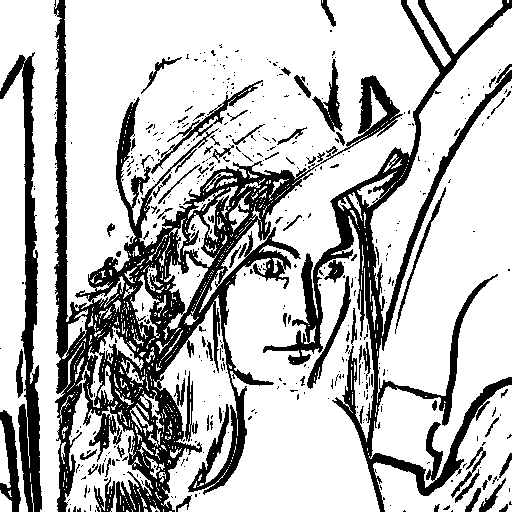

In [139]:
img.fromarray(np.array(g,dtype='uint8'))

In [68]:
pch=img.open('S__243310595.jpg')
pch_arr = np.asarray(pch)
newpch=[[sum(i)//3 for i in j]for j in pch_arr]


In [64]:
def equalizaton(lena):
    mb=[0]*256
    for i in range(len(lena)):
        for j in range(len(lena[0])):
            mb[lena[i][j]]+=1
    step=(len(lena)*len(lena[0]))//256
    bound=step
    newcdf=[0]*256
    idx=0
    db={}
    while newcdf[0]<bound:
            newcdf[0]+=mb[idx]
            db[idx]=0
            idx+=1

    for i in range(1,256):
        newcdf[i]=newcdf[i-1]
        bound+=step
        while newcdf[i]<bound:
            newcdf[i]+=mb[idx]
            db[idx]=i
            idx+=1
    while idx<256:
        newcdf[i]+=mb[idx]
        db[idx]=i
        idx+=1
    res=np.array([[db[i] for i in j] for j in lena],dtype='uint8')
    return res

In [65]:
newpch=equalizaton(newpch)

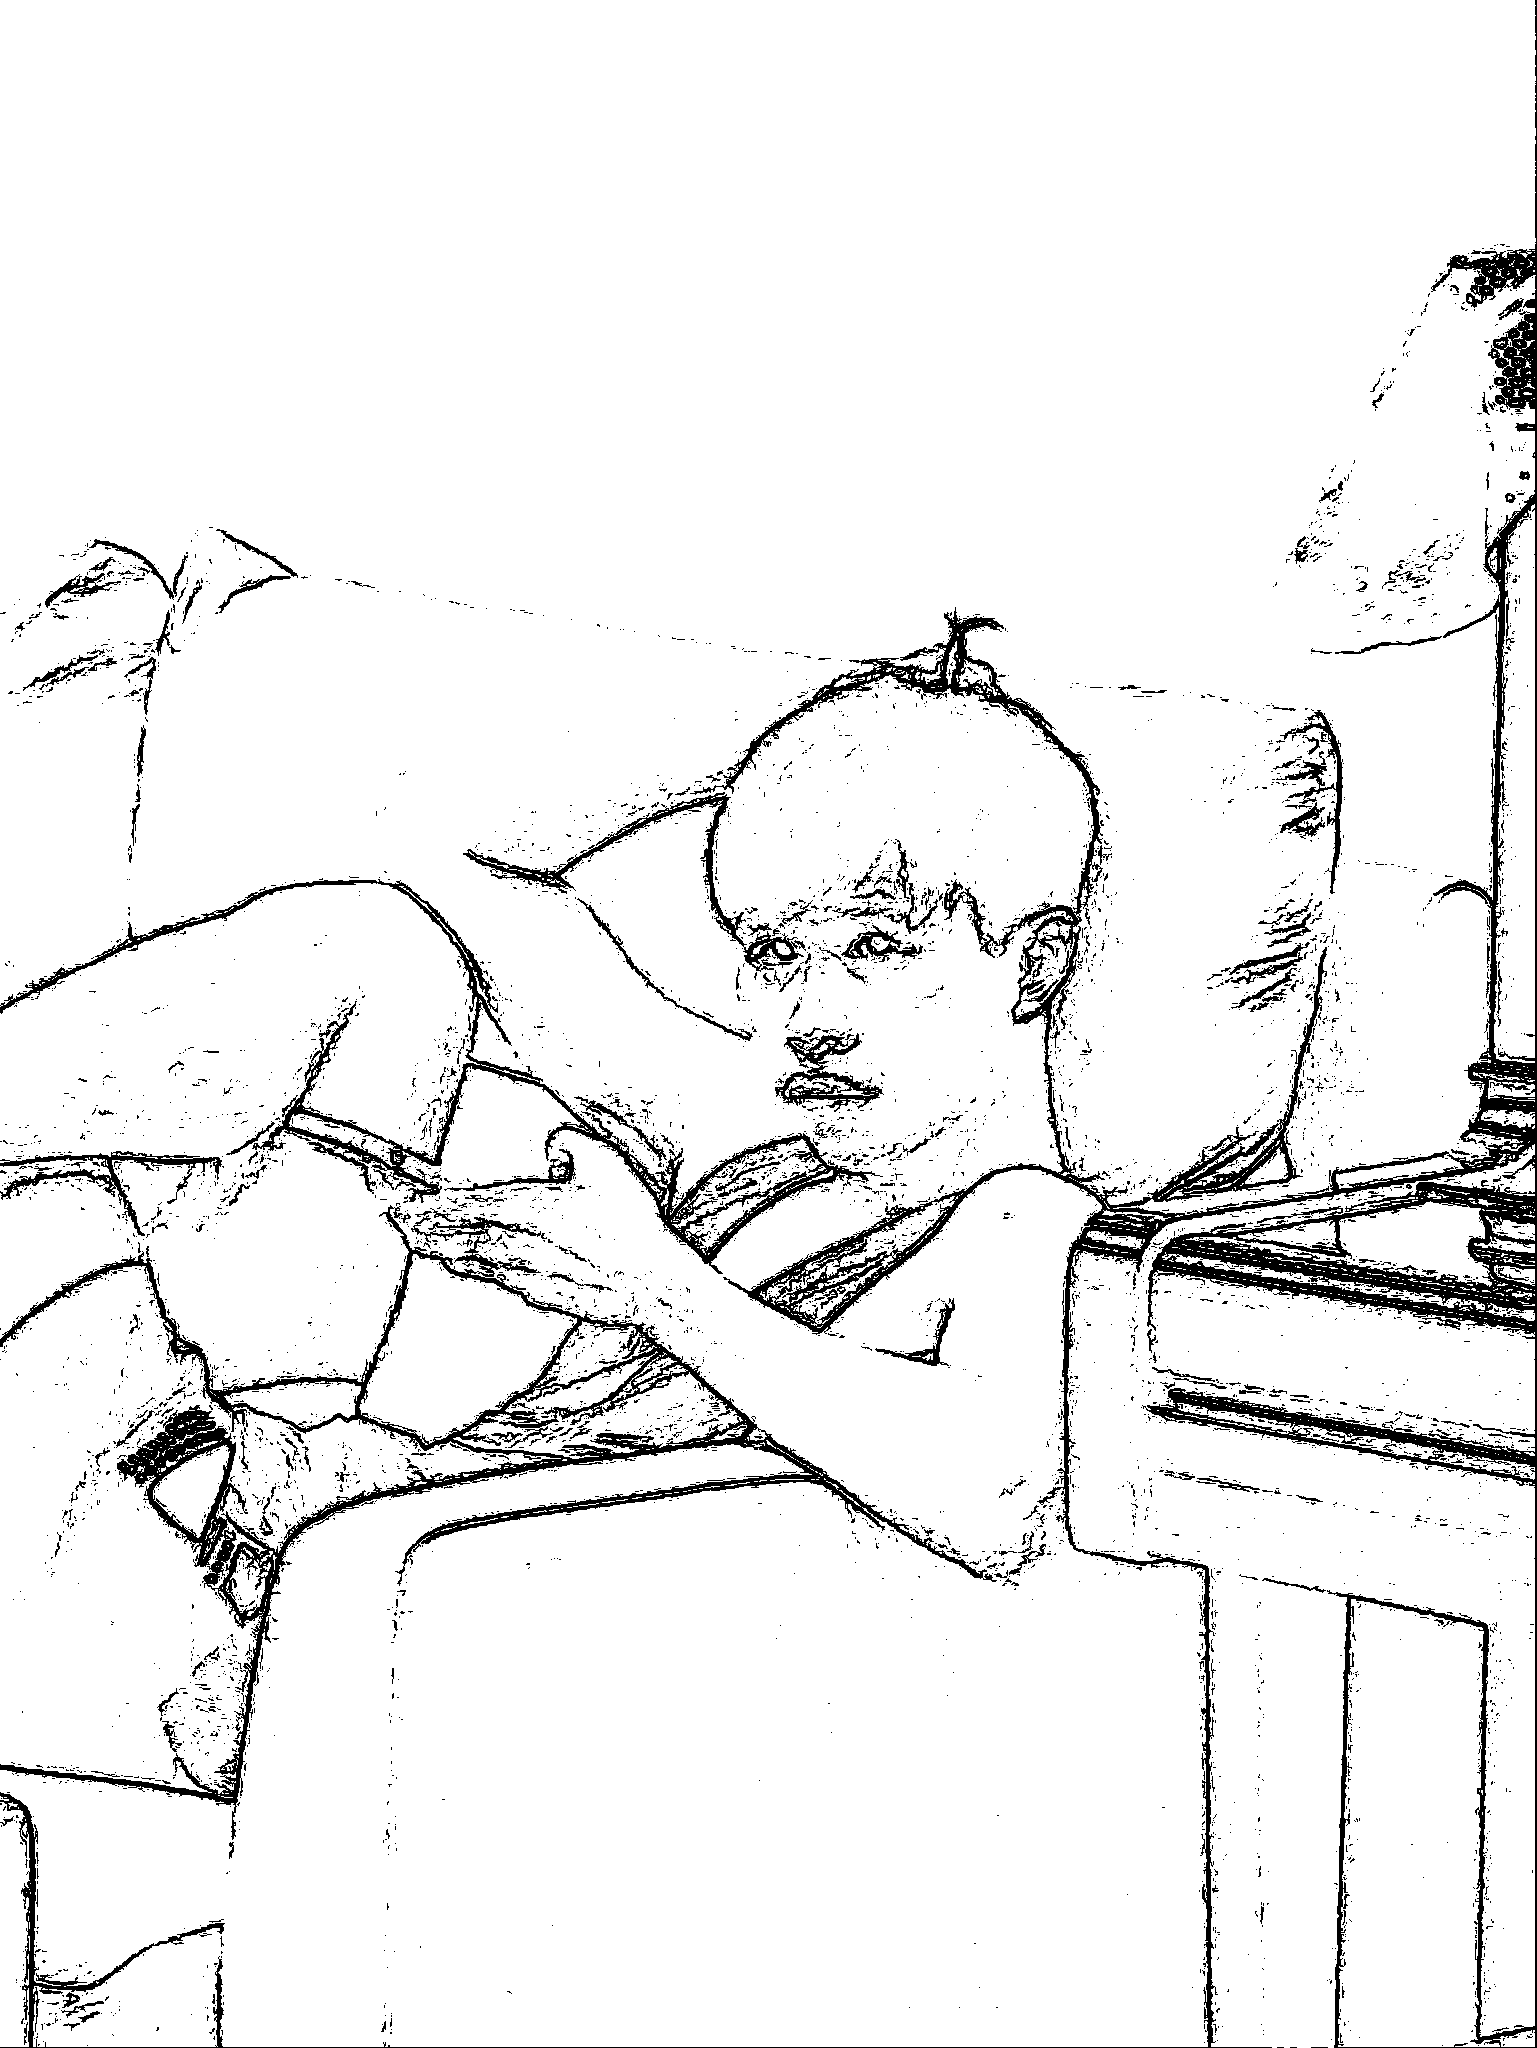

In [69]:
pc=robert(np.array(newpch,dtype='int'),8)
img.fromarray(np.array(pc,dtype='uint8'))

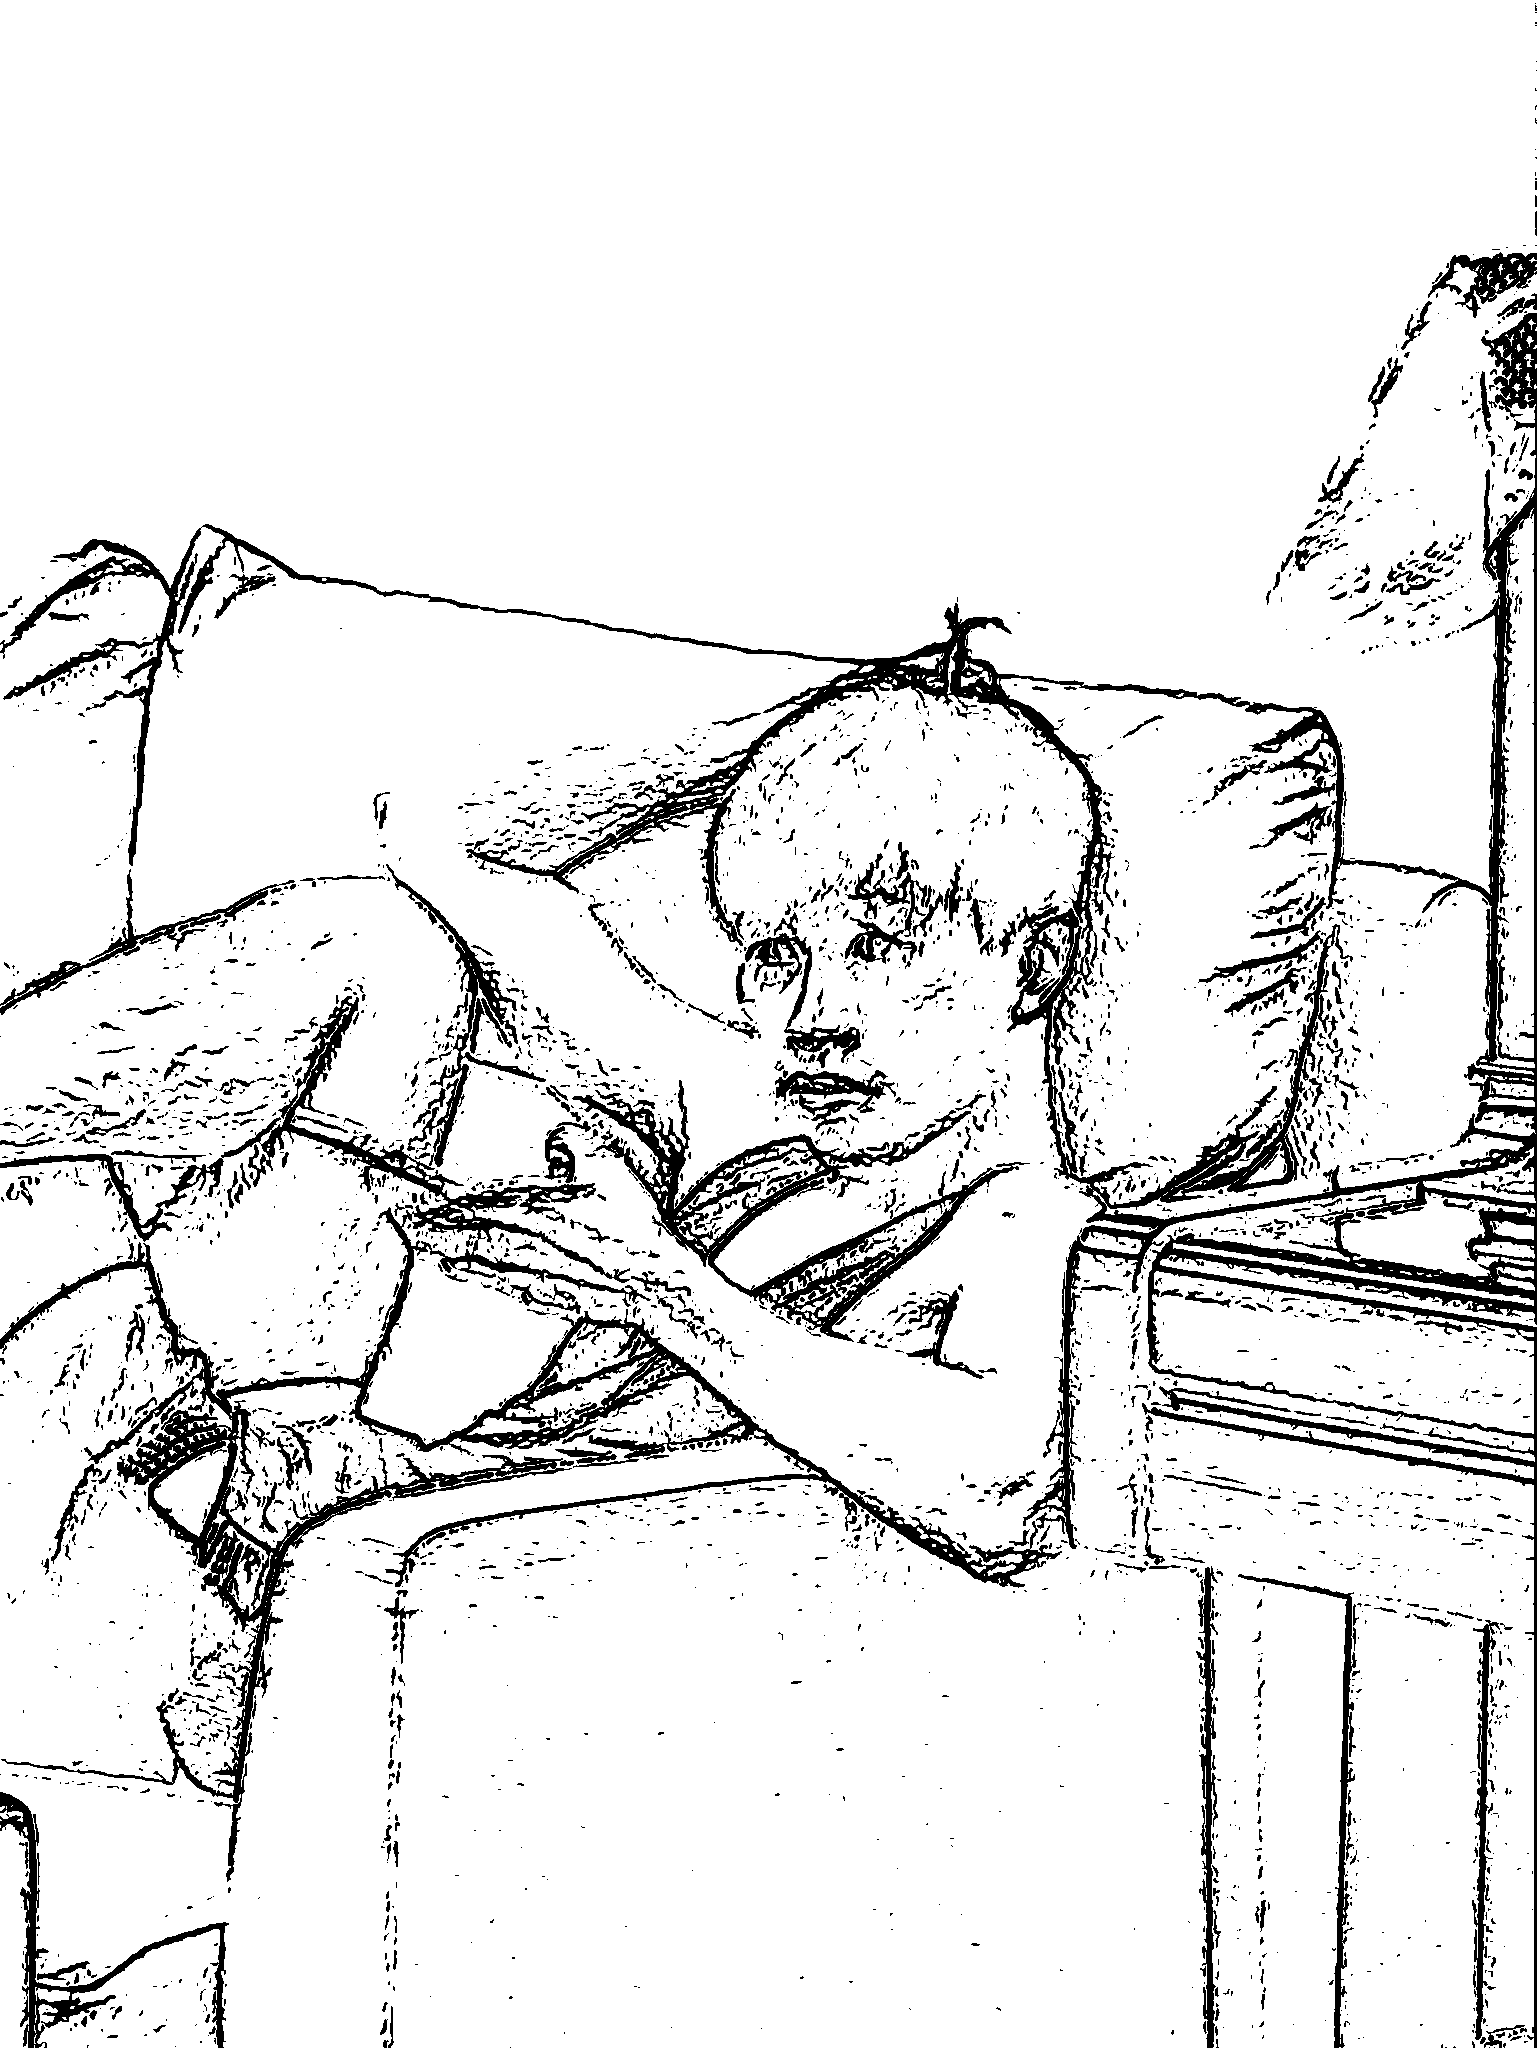

In [142]:
pc=badu(np.array(newpch,dtype='int'),7000)
img.fromarray(np.array(pc,dtype='uint8'))